In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crop = pd.read_csv("Crop Production data.csv")

In [3]:
crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Arecanut,1254.0,2000.0
1,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Rice,102.0,321.0
3,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Banana,176.0,641.0
4,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIYA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIYA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIYA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIYA,2014,Winter,Rice,279151.0,597899.0


In [4]:
crop.shape

(246091, 7)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
crop.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [7]:
crop.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
crop['Production'].mode()

0    1.0
Name: Production, dtype: float64

In [9]:
crop['Production'].value_counts()

Production
1.000000e+00    4028
0.000000e+00    3523
1.000000e+02    3521
2.000000e+00    2964
3.000000e+00    2311
                ... 
2.120000e+08       1
1.070000e+00       1
2.293410e+05       1
1.870600e+04       1
5.978990e+05       1
Name: count, Length: 51627, dtype: int64

In [10]:
crop['State_Name'].value_counts()

State_Name
Uttar Pradesh             33306
Madhya Pradesh            22943
Karnataka                 21122
Bihar                     18885
Assam                     14628
Odisha                    13575
Tamil Nadu                13547
Maharashtra               12628
Rajasthan                 12514
Chhattisgarh              10709
Andhra Pradesh             9628
West Bengal                9613
Gujarat                    8436
Haryana                    5875
TELANGANA                  5648
Uttarakhand                4896
Kerala                     4261
Nagaland                   3906
Punjab                     3173
Meghalaya                  2867
Arunachal Pradesh          2546
Himachal Pradesh           2494
JAMMU AND KASHMIR          1634
Tripura                    1412
Manipur                    1267
Jharkhand                  1266
Mizoram                     957
Puducherry                  876
Sikkim                      714
Dadra and Nagar Haveli      263
Goa                         2

C:\Users\priya\AppData\Local\Temp\ipykernel_12048\3927763832.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Production', y='State_Name', data=top_states, palette='flare')


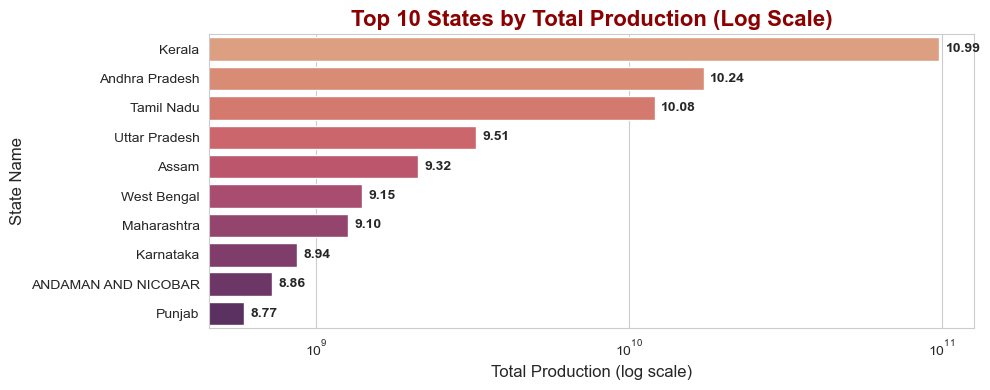

In [11]:
# Prepare the top 10 states data
top_states = (
    crop.groupby('State_Name')['Production']
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
)

# Compute log10 of production for labeling
top_states['log10_Production'] = np.log10(top_states['Production'])

sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))

# Draw the horizontal bar‑plot
ax = sns.barplot(x='Production', y='State_Name', data=top_states, palette='flare')

# Convert x‑axis to log scale
ax.set_xscale('log')

# Annotate each bar with its log10 value
for idx, bar in enumerate(ax.patches):
    log_val = top_states.loc[idx, 'log10_Production']
    ax.text(
        bar.get_width() * 1.05,            # slightly past the end of the bar
        bar.get_y() + bar.get_height()/2,  # vertically centered
        f"{log_val:.2f}",                  # two‑decimals
        ha='left', va='center',
        fontsize=10, fontweight='bold'
    )

# Titles and labels
plt.title('Top 10 States by Total Production (Log Scale)', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Total Production (log scale)', fontsize=12)
plt.ylabel('State Name', fontsize=12)
plt.tight_layout()
plt.show()


#### Maximum crop producing state = Kerala followed by Andhra Pradesh and Tamilnadu

C:\Users\priya\AppData\Local\Temp\ipykernel_12048\4144149966.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Production', y='Crop', data=top_crops, palette='flare')


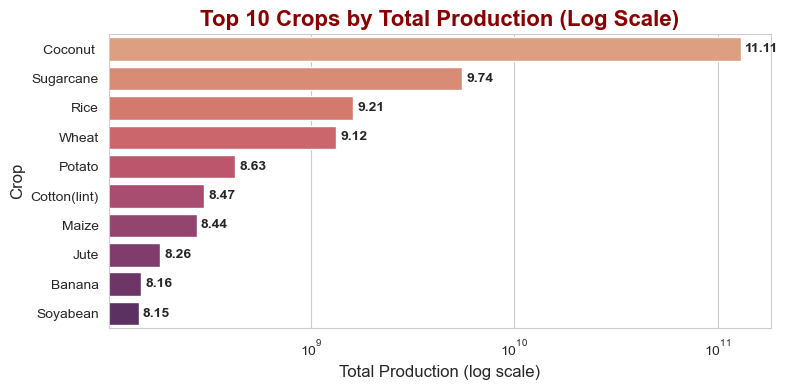

In [12]:
# Prepare the top 10 crops data
top_crops = (
    crop.groupby('Crop')['Production']
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
)

# Compute log10 of production for labeling
top_crops['log10_Production'] = np.log10(top_crops['Production'])

sns.set_style('whitegrid')
plt.figure(figsize=(8, 4))

# Draw the horizontal bar‑plot
ax = sns.barplot(x='Production', y='Crop', data=top_crops, palette='flare')

# Convert x‑axis to log scale
ax.set_xscale('log')

# Annotate each bar with its log10 value
for idx, bar in enumerate(ax.patches):
    log_val = top_crops.loc[idx, 'log10_Production']
    ax.text(
        bar.get_width() * 1.05,           # slightly past the end of the bar
        bar.get_y() + bar.get_height()/2, # vertically centered
        f"{log_val:.2f}",                 # two‑decimals
        ha='left', va='center', 
        fontsize=10, fontweight='bold'
    )

# Titles and labels
plt.title('Top 10 Crops by Total Production (Log Scale)', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Total Production (log scale)', fontsize=12)
plt.ylabel('Crop', fontsize=12)
plt.tight_layout()
plt.show()

### Maximum crop production = Coconut

C:\Users\priya\AppData\Local\Temp\ipykernel_12048\55078042.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='State_Name', y='Production', data=coconut_by_state, palette='crest')


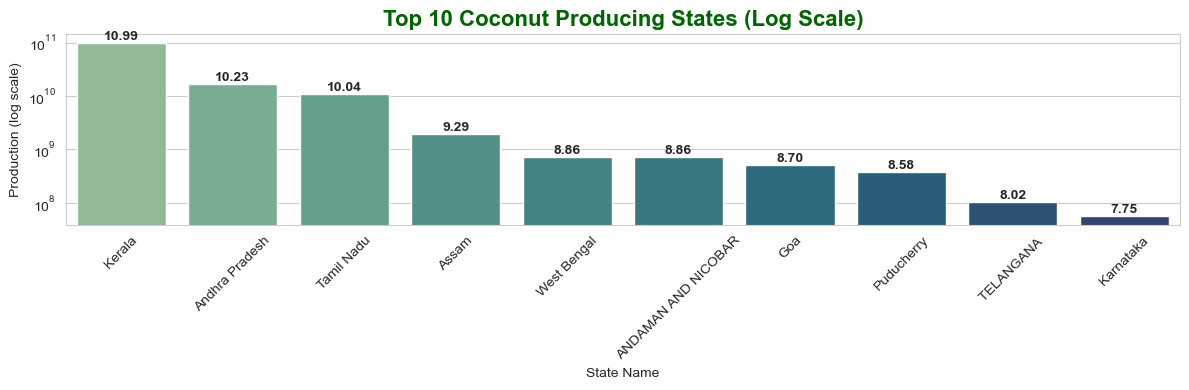

In [13]:
# Clean 'Crop' column
crop['Crop'] = crop['Crop'].str.strip()

# Filter for Coconut and valid production
coconut_data = crop[(crop['Crop'] == 'Coconut') & (crop['Production'] > 0)]

# Group by State
coconut_by_state = (
    coconut_data
    .groupby('State_Name')['Production']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Compute log10 of production for labeling
coconut_by_state['log10_Production'] = np.log10(coconut_by_state['Production'])

# Plot on log scale
plt.figure(figsize=(12, 4))
ax = sns.barplot(x='State_Name', y='Production', data=coconut_by_state, palette='crest')
ax.set_yscale('log')

# Annotate each bar with its log10 value
for idx, bar in enumerate(ax.patches):
    log_val = coconut_by_state.loc[idx, 'log10_Production']
    # place text at top center of bar
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{log_val:.2f}",
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title('Top 10 Coconut Producing States (Log Scale)', fontsize=16, fontweight='bold', color='darkgreen')
plt.xlabel('State Name')
plt.ylabel('Production (log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Maximum Coconut producing state = Kerala

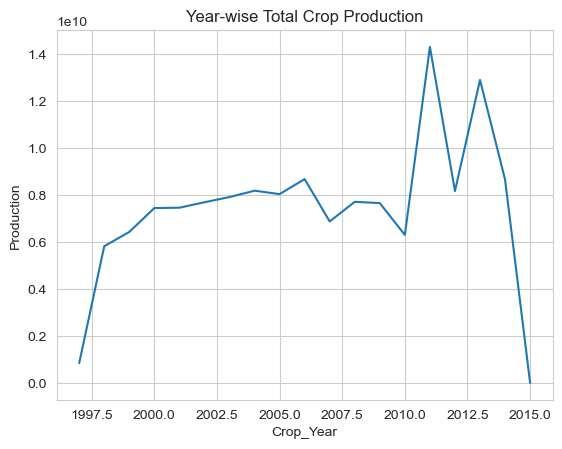

In [14]:
yearly_prod = crop.groupby('Crop_Year')['Production'].sum().reset_index()
sns.lineplot(data=yearly_prod, x='Crop_Year', y='Production')
plt.title('Year-wise Total Crop Production')
plt.show()

#### There is sudden rise in production in 2011 and downfall in 2012 and again rise in 2013.

In [15]:
crop

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Arecanut,1254.0,2000.0
1,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Rice,102.0,321.0
3,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Banana,176.0,641.0
4,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIYA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIYA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIYA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIYA,2014,Winter,Rice,279151.0,597899.0


In [16]:
# Strip spaces and standardize case
crop['Season'] = crop['Season'].str.strip().str.title()

In [17]:
print(crop['Season'].unique())


['Kharif' 'Whole Year' 'Autumn' 'Rabi' 'Summer' 'Winter']


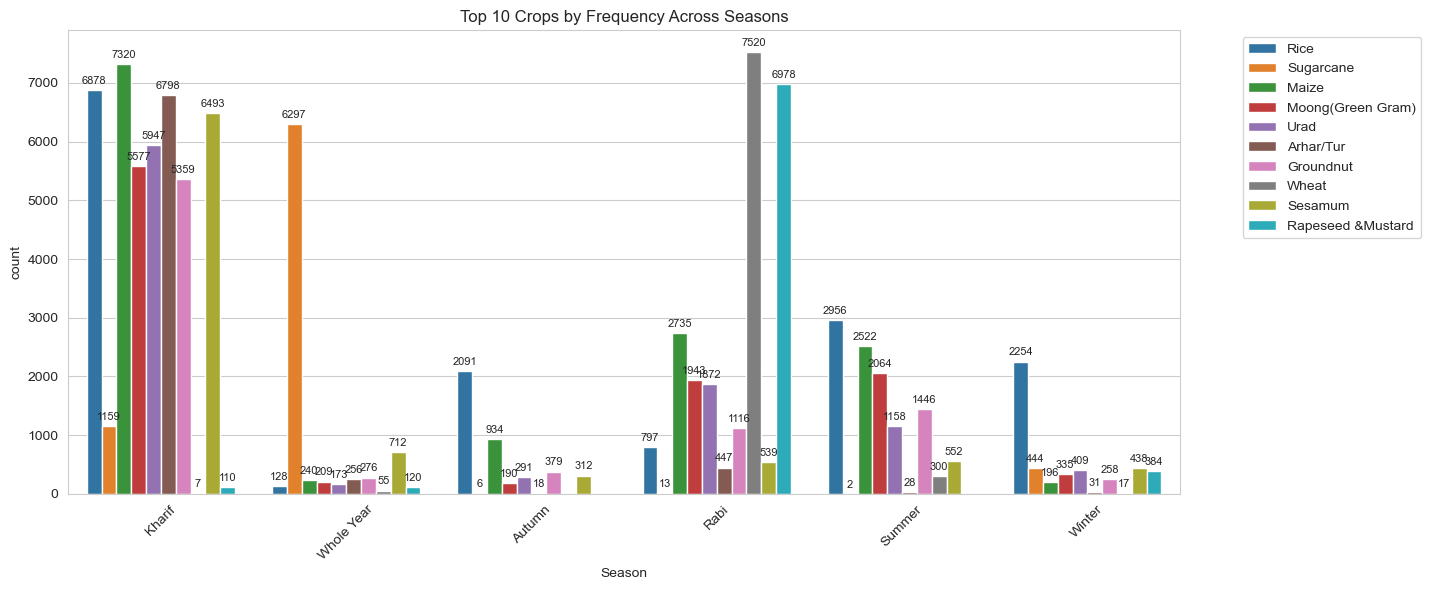

In [18]:
# Count number of entries per crop
top_crops = crop['Crop'].value_counts().nlargest(10).index

# Filter dataset
filtered_crop = crop[crop['Crop'].isin(top_crops)]

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=filtered_crop, x='Season', hue='Crop')
plt.title('Top 10 Crops by Frequency Across Seasons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=8)

plt.show()


Kharif season dominates in terms of crop frequency across all top 10 crops.

Sugarcane appears consistently high in “Whole Year” (as expected).

Wheat and Rapeseed & Mustard show strong presence in the Rabi season.

Rice and Maize span across nearly all seasons, highlighting versatility.

Sesamum and Arhar/Tur are almost exclusively grown in Kharif.

C:\Users\priya\AppData\Local\Temp\ipykernel_12048\4281838230.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=season_prod, x='Season', y='Production', palette='Set2')
C:\Users\priya\AppData\Local\Temp\ipykernel_12048\4281838230.py:33: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.tight_layout()
C:\Users\priya\AppData\Local\Temp\ipykernel_12048\4281838230.py:33: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  plt.tight_layout()
C:\Users\priya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\priya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  fig.canvas

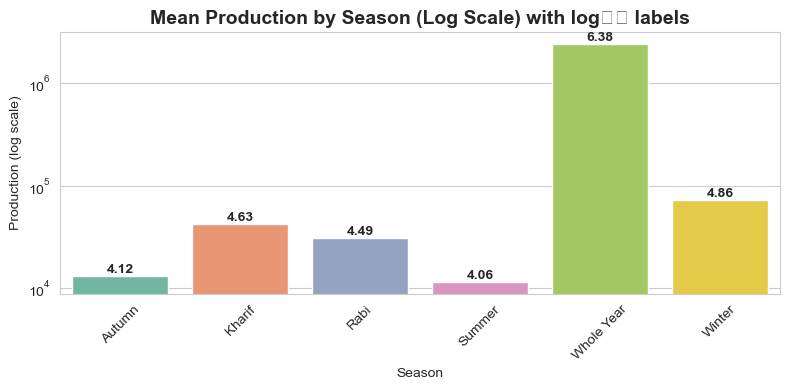

In [19]:
# Clean Season column
crop['Season'] = crop['Season'].str.strip().str.title()

# Compute mean production by season
season_prod = crop.groupby('Season')['Production'].mean().reset_index()

# Also compute the log10 of that mean
season_prod['log10_Production'] = np.log10(season_prod['Production'])

sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))

# Draw barplot (bars at original production heights, but axis is log)
ax = sns.barplot(data=season_prod, x='Season', y='Production', palette='Set2')
ax.set_yscale('log')

# Annotate with log10 values
for index, row in season_prod.iterrows():
    # find the bar center x‐position
    x = index
    # y‐position at the top of the bar in data coordinates
    y = row['Production']
    # annotation text = log10 value formatted
    txt = f"{row['log10_Production']:.2f}"
    ax.text(x, y, txt, ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Mean Production by Season (Log Scale) with log₁₀ labels', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Production (log scale)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### Whole Year Cultivation Has Highest Mean Production:

#### Autumn and Summer have the lowest mean values, around 13,066 and 11,522 respectively

#### Mismatch Between Frequency and Production:
##### Kharif had the most entries in the earlier countplot (i.e., most frequently cultivated), but not the highest production per record.
##### This indicates many small-scale or lower-yield entries in Kharif vs. fewer but larger production entries for whole-year crops.

#### Top producing districts are ALAPPUZHA > AMROHA > AHMADNAGAR > AMRITSAR > ANANTPUR > AMBALA > ALIGARH > AGRA

### Observations:
#### Maximum crop producing state = Kerala followed by Andhra Pradesh and Tamilnadu
#### Maximum crop production = Coconut
#### Maximum Coconut producing state = Kerala
#### Kharif season dominates in terms of crop frequency across all top 10 crops.

#### Sugarcane appears consistently high in “Whole Year” (as expected).

#### Wheat and Rapeseed & Mustard show strong presence in the Rabi season.

#### Rice and Maize span across nearly all seasons, highlighting versatility.

#### Sesamum and Arhar/Tur are almost exclusively grown in Kharif.
#### Whole Year Cultivation Has Highest Mean Production:

#### Autumn and Summer have the lowest mean values, around 13,066 and 11,522 respectively

#### Mismatch Between Frequency and Production:
##### Kharif had the most entries in the earlier countplot (i.e., most frequently cultivated), but not the highest production per record.
##### This indicates many small-scale or lower-yield entries in Kharif vs. fewer but larger production entries for whole-year crops.
#### Top producing districts are ALAPPUZHA > AMROHA > AHMADNAGAR > AMRITSAR > ANANTPUR > AMBALA > ALIGARH > AGRA

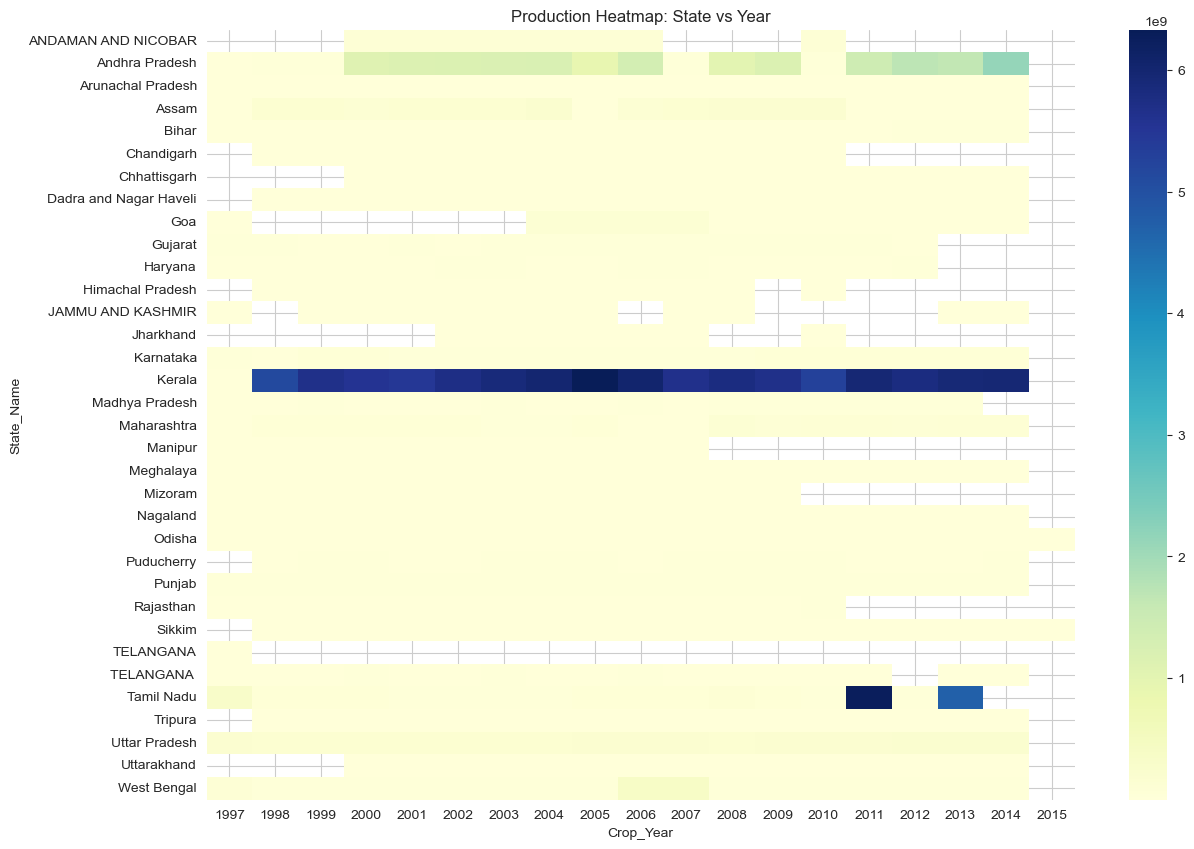

In [20]:
heatmap_data = crop.groupby(['State_Name', 'Crop_Year'])['Production'].sum().unstack()
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Production Heatmap: State vs Year')
plt.show()

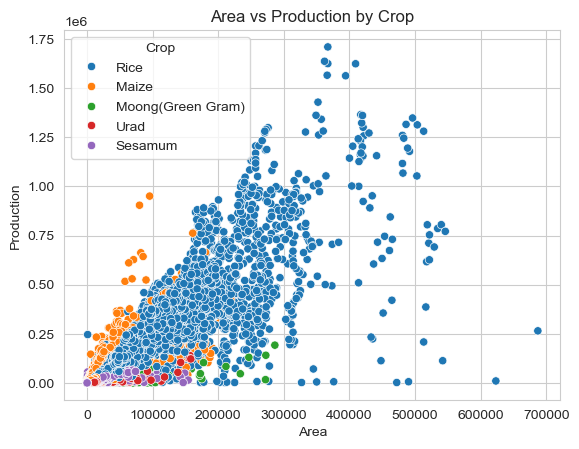

In [21]:
top_crops = crop['Crop'].value_counts().nlargest(5).index
scatter_data = crop[crop['Crop'].isin(top_crops)]
sns.scatterplot(data=scatter_data, x='Area', y='Production', hue='Crop')
plt.title('Area vs Production by Crop')
plt.show()

### Does more area always mean higher production?
At certain level of area, production increased. After that the production declined.
#### Factor	Explanation:
- Soil fertility limits:	Beyond a certain size, you may be farming marginal land with poorer soils.
- Management intensity	It’s harder to maintain uniformly high inputs (irrigation, fertilizer, pest control) over very large tracts.

In [22]:
import pandas as pd

def best_crop_by_state(df, state=None):
    """
    Determine which crop has the highest average yield in each state (or in one state).

    Parameters
    ----------
    df : pd.DataFrame
        Your crop DataFrame; must contain columns ['State_Name','Crop','Area','Production'].
    state : str, optional
        If provided, returns only the best crop for this state.
        If None, returns best crop for every state.

    Returns
    -------
    pd.DataFrame
        DataFrame with columns ['State_Name','Best_Crop','Avg_Yield']
        If state is provided, will have one row; otherwise one row per state.
    """
    # 1. Compute yield per record
    df = df.copy()
    df['Yield'] = df['Production'] / df['Area']

    # 2. Group by state & crop, compute average yield
    state_crop_yield = (
        df
        .groupby(['State_Name','Crop'])['Yield']
        .mean()
        .reset_index()
    )

    # 3. For each state pick the crop with the max average yield
    idx = state_crop_yield.groupby('State_Name')['Yield'].idxmax()
    best = state_crop_yield.loc[idx].rename(columns={'Yield':'Avg_Yield'})

    # 4. Optionally filter to a single state
    if state is not None:
        best = best[best['State_Name'] == state]

    # 5. Sort by Avg_Yield descending (for overview)
    best = best.sort_values('Avg_Yield', ascending=False).reset_index(drop=True)
    return best

# --- Example usage ---

# Get best crop for every state
best_all_states = best_crop_by_state(crop)
print(best_all_states.head())

# Get best crop for a single state, e.g. “Punjab”
best_punjab = best_crop_by_state(crop, state='Kerala')
print(best_punjab)


       State_Name     Crop     Avg_Yield
0      Puducherry  Coconut  11563.106646
1  Andhra Pradesh  Coconut  10689.470339
2      TELANGANA   Coconut  10366.802670
3          Kerala  Coconut   5944.032734
4           Assam  Coconut   5295.174751
  State_Name     Crop    Avg_Yield
0     Kerala  Coconut  5944.032734


In [23]:
def best_state_for_crop(df: pd.DataFrame, crop_name: str):
    """
    For a given crop, find the state with the highest average yield.
    
    Parameters
    ----------
    df : pd.DataFrame
        Must contain columns ['State_Name','Crop','Area','Production'].
    crop_name : str
        The crop to query (must match values in df['Crop']).

    Returns
    -------
    tuple (best_state, best_yield)
        best_state : str
            Name of the state with the highest average yield for this crop.
        best_yield : float
            The corresponding average yield value (Production/Area).
    """
    # Filter to only the specified crop
    sub = df[df['Crop'] == crop_name].copy()
    if sub.empty:
        raise ValueError(f"No data found for crop '{crop_name}'")

    # Compute yield per record
    sub['Yield'] = sub['Production'] / sub['Area']

    # Compute average yield by state
    state_yields = (
        sub
        .groupby('State_Name')['Yield']
        .mean()
        .reset_index()
    )

    # Identify the state with the maximum average yield
    idx = state_yields['Yield'].idxmax()
    best_state = state_yields.loc[idx, 'State_Name']
    best_yield = state_yields.loc[idx, 'Yield']

    return best_state, best_yield

# Example usage:
state, yld = best_state_for_crop(crop, 'Rice')
print(f"Best state for Rice: {state} (avg yield = {yld:.2f})")


Best state for Rice: Chandigarh (avg yield = 4.70)


Best state for Rice: Chandigarh (avg yield = 4.70)


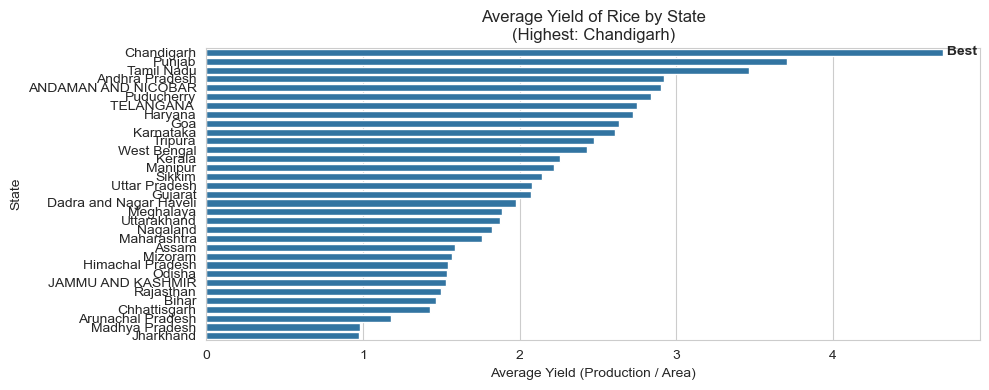

In [24]:
def plot_best_state_for_crop(df, crop_name):
    """
    Filters df for crop_name, computes average yield by state,
    prints the best state, and draws a horizontal bar‑plot of yield.
    """
    # 1) filter and compute yield
    sub = df[df['Crop'] == crop_name].copy()
    if sub.empty:
        raise ValueError(f"No data for crop '{crop_name}'")
    sub['Yield'] = sub['Production'] / sub['Area']
    
    # 2) average yield by state
    state_yields = (
        sub.groupby('State_Name')['Yield']
           .mean()
           .reset_index()
           .sort_values('Yield', ascending=False)
    )
    
    best_state = state_yields.iloc[0]['State_Name']
    best_yield = state_yields.iloc[0]['Yield']
    print(f"Best state for {crop_name}: {best_state} (avg yield = {best_yield:.2f})")
    
    # 3) plot
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(data=state_yields, x='Yield', y='State_Name')
    
    # annotate the best bar
    # the first bar in state_yields is the best
    bar = ax.patches[0]
    ax.text(
        bar.get_width(), 
        bar.get_y() + bar.get_height()/2,
        " Best", 
        va='center', 
        ha='left', 
        fontsize=10, 
        fontweight='bold'
    )
    
    plt.title(f'Average Yield of {crop_name} by State\n(Highest: {best_state})')
    plt.xlabel('Average Yield (Production / Area)')
    plt.ylabel('State')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_best_state_for_crop(crop, 'Rice')
